# Summary

In [1]:
import pandas as pd

import Reader
import LogKeysManager
import ParamsExtractor
import DataPreprocessor
import ReduceDim
import ClusterData
import Spell
import Spell2

2024-06-07 16:53:21.752333: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 16:53:21.752940: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 16:53:21.756700: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 16:53:21.801611: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 16:53:22.612199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
#log_types = ['cron', 'user']
log_types = ['cron', 'laurel', 'maillog', 'messages', 'secure', 'user']
file_paths = ['../../../temp_logs/login01.' + logtype + '.log' for logtype in log_types]

df_list = []

for file_path in file_paths:
    r = Reader.Reader(file_path)
    df = r.read_file(file_path)
    df_list.append(df)

In [3]:
df_after = []

for i, df in enumerate(df_list):
    p = ParamsExtractor.ParamsExtractor(df)
    df = p.convert_params(df)
    new_df = p.get_params()
    df_after.append(new_df)


for i in range(len(df_list)):
    #print('=================')
    #print(df_list[i].head())
    #print(df_list[i].columns)
    #print(df_list[i].iloc[0])
    #print('********')
    #print(df_after[i].head())
    #print(df_after[i].columns)
    #print(df_after[i].iloc[0])
    # Concatenate df and df_after
    df_list[i] = pd.concat([df_list[i], df_after[i]], axis=1)
    #print(df_list[i].columns)

In [4]:
df_list[0].head()

,host,ident,pid,message,severity,facility,time,severity_numbers,facility_numbers,severity_scores,timedelta,user_cron,fp_length,log_key_n,bet_par
0,login01,CROND,53766,(root) CMD (/cinecalocal/scripts/clean_shm_fil...,info,cron,2024-03-27 00:00:01 +0100,6,9,1.0,0.0,root,2,0,-1
1,login01,CROND,53767,(root) CMD ( /cinecalocal/nagios/passive/passi...,info,cron,2024-03-27 00:00:01 +0100,6,9,1.0,0.0,root,1,1,-1
2,login01,CROND,53822,(a07cmc01) CMD (source /g100_work/CMCC_medfs_0...,info,cron,2024-03-27 00:00:01 +0100,6,9,1.0,0.0,a07cmc01,3,2,-1
3,login01,CROND,53823,(a07cmc01) CMD (/g100_work/CMCC_medfs_0/downlo...,info,cron,2024-03-27 00:00:01 +0100,6,9,1.0,0.0,a07cmc01,3,3,-1
4,login01,CROND,55382,(root) CMD (run-parts /etc/cron.hourly),info,cron,2024-03-27 00:01:01 +0100,6,9,1.0,60.0,root,1,4,-1


In [5]:
for i, df in enumerate(df_list):
    d = DataPreprocessor.DataPreprocessor(df)
    enc = d.drop_and_hash_encode()
    df_list[i] = enc

print(df_list[0].head())

   severity_scores  timedelta  fp_length  log_key_n  col_0  col_1  col_2  \
0              1.0        0.0          2          0      1      0      0   
1              1.0        0.0          1          1      1      0      0   
2              1.0        0.0          3          2      1      0      0   
3              1.0        0.0          3          3      1      0      1   
4              1.0       60.0          1          4      1      0      0   

   col_3  col_4  col_5  ...  col_10  col_11  col_12  col_13  col_14  col_15  \
0      0      0      0  ...       0       0       1       0       0       0   
1      0      1      0  ...       0       0       1       0       0       0   
2      0      0      0  ...       0       0       1       0       0       0   
3      0      0      0  ...       0       0       1       0       0       0   
4      0      0      0  ...       0       0       1       0       0       0   

   col_16  col_17  col_18  col_19  
0       0       1       0       

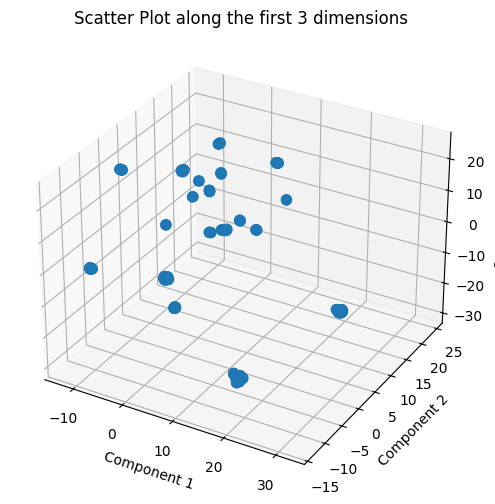

In [6]:
r = ReduceDim.ReduceDim(3, df_list[0], [1,0])
umap_reduced_data = r.umap()

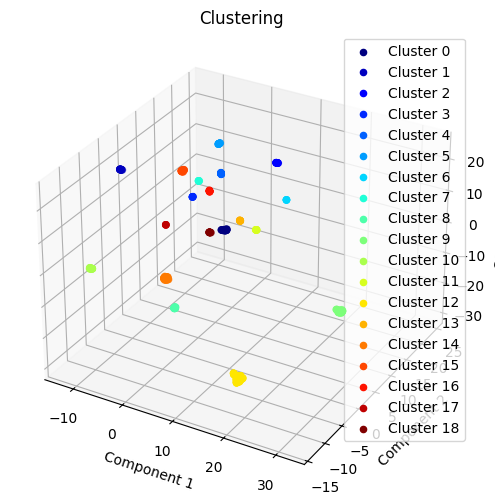

In [7]:
c = ClusterData.ClusterData(umap_reduced_data, [1,0])
dbscan_clustered_data = c.dbscan()